In [84]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import plot_roc_curve
from sklearn.svm import SVC


In [2]:
### Loading dataset
titanic_df = pd.read_csv(r"C:/Users/swati/Downloads/dataset1-master/dataset1-master/titanic_train.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.shape

(891, 12)

In [ ]:
There are 891 rows and 12 columns.So we have very small dataset.

In [5]:
## Checking info:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1.Name,Sex,Ticket,Cabin and Embarked are Categorical columns.
2.Age and Cabin have missing values.

In [7]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So Age has 177 missing values and Cabin has 687 missing values.

In [8]:
titanic_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

Cabin has large number of missing values,so dropping this column.

In [9]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


So we can see,Cabin column is deleted.

In [11]:
titanic_df.shape

(891, 11)

In [12]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

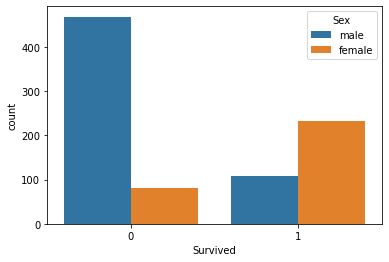

In [14]:
### Visualizing through graph:
sns.countplot(x='Survived',hue = 'Sex',data = titanic_df)

0 represents not survived
1 represents survived.


In [16]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

342 persons are survived only in which almost 220 are women only.

<AxesSubplot:xlabel='Survived', ylabel='count'>

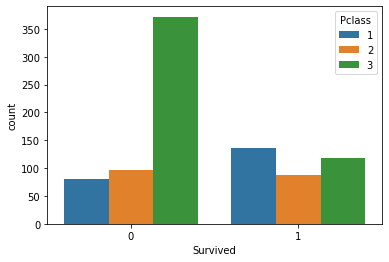

In [17]:
sns.countplot(x='Survived',hue = 'Pclass',data = titanic_df)

So we can see passenger from first class are survived more than second and third class.

<AxesSubplot:xlabel='Sex', ylabel='count'>

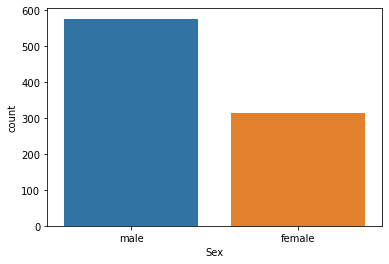

In [18]:
sns.countplot(x='Sex',data = titanic_df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

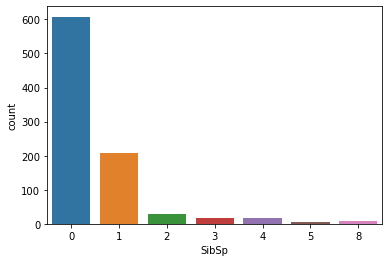

In [19]:
sns.countplot(x='SibSp',data = titanic_df)

SibSp means Sibling/Spouse.So here can see large numbers are showing that person is travelling alone.

<AxesSubplot:xlabel='Parch', ylabel='count'>

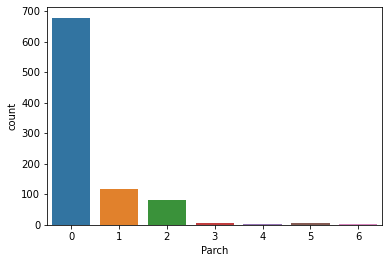

In [20]:
sns.countplot(x='Parch',data = titanic_df)

Parch means Parent/child.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

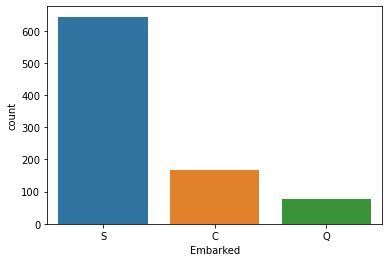

In [21]:
sns.countplot(x='Embarked',data = titanic_df)

<AxesSubplot:>

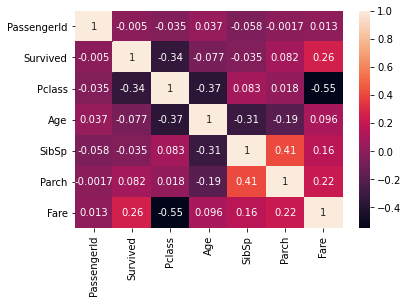

In [23]:
### Checking Correlation :-
sns.heatmap(titanic_df.corr(),annot = True)

As per my analysis,PassengerId,Name and Ticket columns have not very much impact on Target column.So dropping these columns.

In [24]:
titanic_df.drop(columns = ['PassengerId','Name','Ticket'],axis= 1,inplace=True)

In [25]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
titanic_df.shape

(891, 8)

Now will see distribution in Age and Fare column.

<AxesSubplot:xlabel='Age', ylabel='Density'>

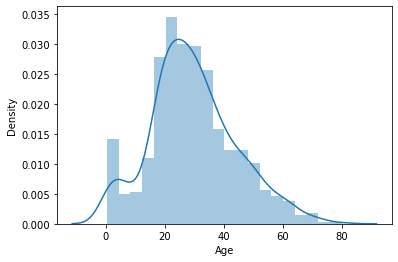

In [27]:
sns.distplot(titanic_df['Age'].dropna())

<AxesSubplot:xlabel='Age'>

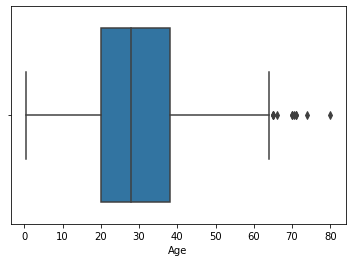

In [28]:
sns.boxplot(titanic_df['Age'])

Since some outliers are showing ,so will take Median to fill missing values.

In [32]:
titanic_df['Age'].median()

28.0

In [29]:
titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace = True)

In [30]:
titanic_df['Age'].isnull().sum()

0

So now not any null values are present.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

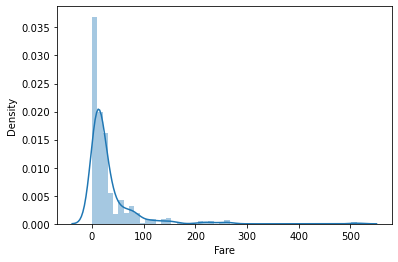

In [31]:
sns.distplot(titanic_df['Fare'])

##   Encoding for categorical columns

In [44]:
sex = pd.get_dummies(titanic_df['Sex'],drop_first = True)
embark = pd.get_dummies(titanic_df['Embarked'],drop_first = True)

In [45]:
titanic_df.drop(['Sex','Embarked'],axis=1,inplace = True)

In [46]:
titanic_df = pd.concat([titanic_df,sex,embark],axis=1)

In [47]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [48]:
titanic_df.shape

(891, 9)

In [51]:
### Splitting data between Features and labels:-
x =titanic_df.drop('Survived',axis=1)
y = titanic_df['Survived']

In [52]:
x.shape

(891, 8)

In [53]:
y.shape

(891,)

In [54]:
### Standardization:-
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [55]:
## Finding best random state:-
maxAcc = 0
maxrs =0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size =0.25,random_state =i)
    lgr = LogisticRegression()
    lgr.fit(x_train,y_train)
    pred_test = lgr.predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    
    if acc >maxAcc:
        maxAcc=acc
        maxrs=i
print("Best Accuracy is :",maxAcc,"at random state",maxrs)        

Best Accuracy is : 0.8789237668161435 at random state 150


# Train Test Split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size =0.25,random_state =150)


In [56]:
x_train.shape

(668, 8)

In [57]:
y_train.shape

(668,)

In [58]:
x_test.shape

(223, 8)

In [59]:
y_test.shape

(223,)

# Logistic Regression

In [61]:
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
pred_lgr = lgr.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,pred_lgr))
print(confusion_matrix(y_test,pred_lgr))
print(classification_report(y_test,pred_lgr))

Accuracy Score :  0.8789237668161435
[[123  11]
 [ 16  73]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       134
           1       0.87      0.82      0.84        89

    accuracy                           0.88       223
   macro avg       0.88      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223



# Decision Tree Classifier

In [62]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test) 
print("Accuracy Score : ",accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

Accuracy Score :  0.852017937219731
[[115  19]
 [ 14  75]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       134
           1       0.80      0.84      0.82        89

    accuracy                           0.85       223
   macro avg       0.84      0.85      0.85       223
weighted avg       0.85      0.85      0.85       223



# RandomForest Classifier

In [63]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test) 
print("Accuracy Score : ",accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

Accuracy Score :  0.8699551569506726
[[123  11]
 [ 18  71]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       134
           1       0.87      0.80      0.83        89

    accuracy                           0.87       223
   macro avg       0.87      0.86      0.86       223
weighted avg       0.87      0.87      0.87       223



# KNeighbors Classifier

In [67]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
pred_knc = knc.predict(x_test) 
print("Accuracy Score : ",accuracy_score(y_test,pred_knc))
print(confusion_matrix(y_test,pred_knc))
print(classification_report(y_test,pred_knc)) 

Accuracy Score :  0.8430493273542601
[[122  12]
 [ 23  66]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       134
           1       0.85      0.74      0.79        89

    accuracy                           0.84       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



# SVM

In [68]:
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test) 
print("Accuracy Score : ",accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc)) 


Accuracy Score :  0.8834080717488789
[[129   5]
 [ 21  68]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       134
           1       0.93      0.76      0.84        89

    accuracy                           0.88       223
   macro avg       0.90      0.86      0.87       223
weighted avg       0.89      0.88      0.88       223



# Cross Validation of all models:-


In [71]:
cvs= cross_val_score(lgr,x_scaler,y,cv=5)
print("Cross Validation of Logistic Regression model ",cvs.mean())


Cross Validation of Logistic Regression model  0.7856506182913816


In [72]:
cvs1= cross_val_score(dtc,x_scaler,y,cv=5)
print("Cross Validation of Decision Tree Classifier model ",cvs1.mean())


Cross Validation of Decision Tree Classifier model  0.7778293892411023


In [73]:
cvs2= cross_val_score(rfc,x_scaler,y,cv=5)
print("Cross Validation of Random Forest Classifier model ",cvs2.mean())


Cross Validation of Random Forest Classifier model  0.8125918021467579


In [79]:
cvs3= cross_val_score(knc,x_scaler,y,cv=5)
print("Cross Validation of KNeighbors Classifier model ",cvs3.mean())


Cross Validation of KNeighbors Classifier model  0.811461929571276


In [80]:
cvs4= cross_val_score(svc,x_scaler,y,cv=5)
print("Cross Validation of SVM Classifier model ",cvs4.mean())


Cross Validation of SVM Classifier model  0.8294017952419811


Since Cross validation for SVM is highest among other models,so will do HyperParameter tuning for SVM.

# HyperParameter Tuning

In [81]:
SVC()
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
gcv = GridSearchCV(SVC(),param_grid)
gcv.fit(x_train,y_train)
gcv.best_params_


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [82]:
### Providing best parameters:
svc = SVC(C = 1000,gamma = .001,kernel = 'rbf')
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)

print("Accuracy Score : ",accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc)) 


Accuracy Score :  0.874439461883408
[[125   9]
 [ 19  70]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       134
           1       0.89      0.79      0.83        89

    accuracy                           0.87       223
   macro avg       0.88      0.86      0.87       223
weighted avg       0.88      0.87      0.87       223



# ROC AUC Plot

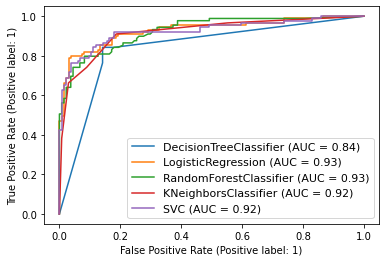

In [85]:
###Plotting ROC AUC Curve:
disp =plot_roc_curve(dtc,x_test,y_test)   
plot_roc_curve(lgr,x_test,y_test,ax = disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax = disp.ax_)

plt.legend(prop={'size': 11},loc = 'lower right')
plt.show()


Auc for Logistic Regression and Random Forest is more and equal,So saving model with Logistic Regression.

# Saving Model

In [86]:
import pickle
filename = 'Titanic_dataset.pickle'
pickle.dump(svc,open(filename,'wb'))
